In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
data = np.genfromtxt('Datasets/unlabeled_data.txt', delimiter=' ')

In [3]:
data.shape

(420, 2)

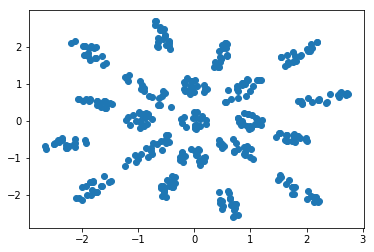

In [4]:
plt.scatter(data[:,0], data[:,1])

In [5]:
colormap = {
    -1:'sienna',
    0:'tomato',
    1:'azure',
    2:'crimson',
    3:'green',
    4:'grey',
    5:'gold',
    6:'indigo',
    7:'lavender',
    8:'lime',
    9:'maroon',
    10:'navy',
    11:'olive',
    12:'orange',
    13:'orchid',
    14:'plum',
    15:'salmon',
    16:'aqua',
    17:'silver',
    18:'tan',
    19:'teal',
    20:'beige',
    21:'violet',
    22:'yellow',
    23:'magenta',
    24:'plum',
    25:'lightblue'
}

<h3>Útil</h3>

In [6]:
from matplotlib.colors import LinearSegmentedColormap

def fPrint(out):
    c = [colormap[i] for i in out]
    plt.scatter(data[:,0], data[:, 1], c=c, edgecolors='k')
    
range_de_clusters = [2, 3, 5, 10, 15, 20, 21, 22, 23, 25, 28, 30, 35]

<h3>Kmeans</h3>

In [7]:
from sklearn.cluster import Birch, DBSCAN, KMeans

def fkmeans(i):
    kmeans = KMeans(n_clusters=i)
    kmeans_out = kmeans.fit_predict(data)
    return kmeans_out

('Quantidade de clusters: ', 21)
('SILHOUETTE Score: ', 0.6673926857402916)
('Calinski Harabaz Score: ', 1128.4863068102754)


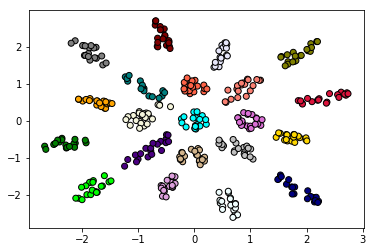

In [8]:
from sklearn.metrics import silhouette_score, calinski_harabaz_score

bestS = 0
bestI = 0
bestOut = 0
chOut = 0

for i in range_de_clusters:    
    kmeans_out = fkmeans(i)
    
    s = silhouette_score(data, kmeans_out)    
    ch = calinski_harabaz_score(data,kmeans_out)
    
    if bestS<s:
        bestS=s
        bestI=i
        bestOut = kmeans_out
        chOut = ch
            
    #print('Silhouette score:' , s, ' Clusters: ', i)
    #print('Calinski Harabaz score:' , ch, ' Clusters: ', i)
    

print('Quantidade de clusters: ', bestI)
print('SILHOUETTE Score: ', bestS)
print('Calinski Harabaz Score: ', chOut)

fPrint(bestOut)

<h3>DBSCAN</h3>

In [9]:
def fdbscan():
    dbscan = DBSCAN(eps=0.26)
    dbscan_out = dbscan.fit_predict(data)
    dbscan_fit = dbscan.fit(data)
    return dbscan_out, dbscan_fit

('Melhor quantidade de clusters: ', 21, ' Score: ', 0.6673660152827566)


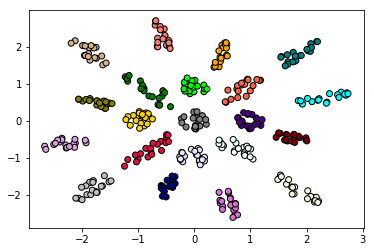

In [10]:
bestOut, dbs = fdbscan()
labels = dbs.labels_
bestI = len(set(labels))
bestS = silhouette_score(data, labels)

print('Melhor quantidade de clusters: ', bestI, ' Score: ', bestS)
fPrint(bestOut)

<h3>Birch</h3>

In [11]:
def fbirch(i):
    birch = Birch(n_clusters=i, branching_factor=2, threshold=0.1)
    birch_pred_groups = birch.fit_predict(data)
    return birch_pred_groups

('Quantidade de clusters: ', 21)
('SILHOUETTE Score: ', 0.6673660152827566)
('Calinski Harabaz Score: ', 1122.806378429912)


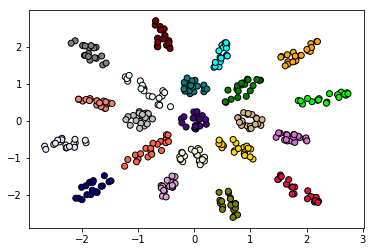

In [12]:
bestS = 0
bestI = 0
bestOut = 0
chOut = 0

for i in range_de_clusters:    
    birch_pred_groups = fbirch(i)
    
    s = silhouette_score(data, birch_pred_groups)
    ch = calinski_harabaz_score(data,birch_pred_groups)
    
    if bestS<s:
        bestS=s
        bestI=i
        bestOut = birch_pred_groups
        chOut = ch
            
    #print('Silhouette score:' , s, ' Clusters: ', i)
    #print('Calinski Harabaz score:' , ch, ' Clusters: ', i)
    

print('Quantidade de clusters: ', bestI)
print('SILHOUETTE Score: ', bestS)
print('Calinski Harabaz Score: ', chOut)

fPrint(bestOut)